In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import  KMeans
from joblib import dump, load
import matplotlib.pyplot as plt


In [2]:
# repertoire (relatif) des ficheirs de données
data_path = '../../Data'
models_path = '../../Models'
df = pd.read_csv('{}/accidents.csv'.format(data_path))


In [3]:
coords=df[['lat','long']]

In [4]:
scores = []

for k in np.arange(10,100) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    
    scores.append(kmeans.score(coords))


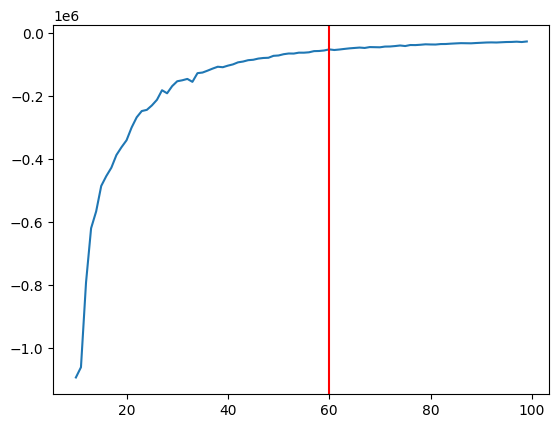

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10,100), scores)
plt.axvline(60, color='r')

In [7]:
# nous fixons le nombre de clusters à 60
kmeans = KMeans(n_clusters = 60)
kmeans.fit(coords)



centers = kmeans.cluster_centers_
labels = kmeans.labels_

dump(kmeans, '{}/clustering_geoloc.joblib'.format(models_path))


['../../Models/clustering_geoloc.joblib']

In [144]:
import folium

In [145]:
map = folium.Map(location=[0,0], zoom_start=1)

In [146]:
for p in centers :
    folium.Marker(p, popup='Point', tooltip  = f"{p[0]} - {p[1]}").add_to(map)

In [147]:
map.save("{}/centroids.html".format(data_path))

In [148]:
map

In [149]:
#sauvegarde du fichier

df = df.drop(['lat','long'], axis = 1)
df.to_csv('{}/accidents_geolocalises.csv'.format(data_path), index = False)

In [ ]:
#fin du fichier